In [15]:
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

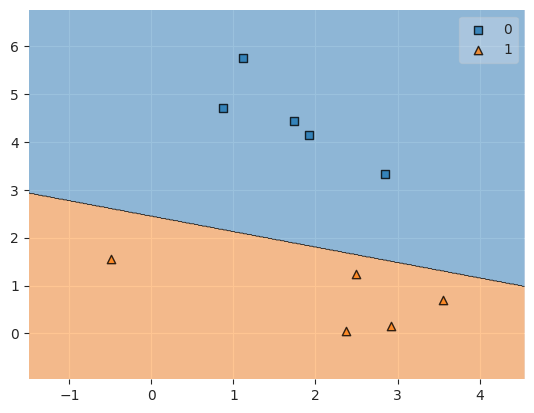

In [16]:
X, y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=0)

class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.normal(size=input_size)
        self.bias = np.random.normal()

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return np.where(summation > 0.5, 1, 0)

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                pred = self.predict(inputs)
                self.weights += learning_rate * (label - pred) * inputs
                self.bias += learning_rate * (label - pred)


model = Perceptron(input_size=len(X[0]))
model.train(X, y, epochs=10, learning_rate=0.1)

plot_decision_regions(X, y, clf=model)
plt.show()

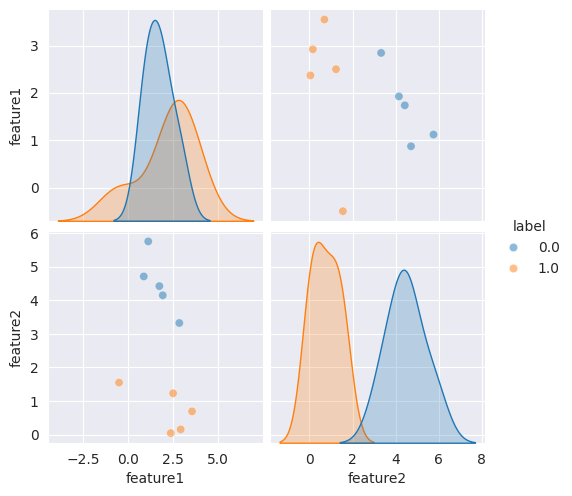

In [18]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=['feature1', 'feature2', 'label'])
sns.pairplot(df, hue='label', plot_kws={'alpha': 0.5})
plt.show()